#Wine Quality Prediction through SVM and LR
- Data Exploration and Preprocessing

    - Explore the dataset thoroughly and provide a summary of your observations.
    - Perform necessary preprocessing steps:
        * Preparing feature values to be used by your models.
        * Optionally, data augmentation techniques.
        * Splitting the data into training and test sets appropriately.

- SVM and LR Implementation
    - Implement both SVM and LR from scratch. Evaluate and compare their performance.
    - Clearly define the two models and describe your implementation, also listing their hyperparameters if any.
    - Train the two models using an appropriate performance metric.
    - Demonstrate proper hyperparameter tuning, and evaluate at least one of your models using accuracy estimates via 5-fold cross-validation.

- Kernel Methods
    - Extend the above models to a kernelized form by adopting non-linear kernels.
    - Clearly describe how the kernelization happens and its consequences for both predictions and performance.
    - Comment on how the kernelized models compare with respect to the standard ones.

- Evaluation and Analysis
    - Evaluate your model performance using suitable metrics such as accuracy, precision, recall, and F1-score.
    - Provide appropriate visualizations of the performance of each model (loss and accuracy).
    - When reasonable, conduct an analysis of misclassified examples to understand potential model limitations.
    - Discuss the presence or absence of overfitting and underfitting at any point.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
#to output plots within the notebook
%matplotlib inline

import importlib
import inspect
import os
import sys

%cd /content/
!ls -R
repo_name = "WineQualityPrediction"
#!rm -rf {repo_name}
if not os.path.exists(repo_name):
    print(f"Directory {repo_name} does not exist, proceeding with clone.")
    !git clone https://github.com/Abudo-S/WineQualityPrediction.git

%cd WineQualityPrediction


import PCA as PCA_Module
import SVM as SVM_Module
import LogisticRegression as LogisticRegression_Module
import KCrossValidation as KCrossValidation_Module
import Kernel as Kernel_Module
importlib.reload(PCA_Module) # in case of updates
importlib.reload(SVM_Module) # in case of updates
importlib.reload(LogisticRegression_Module) # in case of updates
importlib.reload(KCrossValidation_Module) # in case of updates
importlib.reload(Kernel_Module) # in case of updates
from PCA import PCA
from SVM import SVM
from LogisticRegression import LogisticRegression
from KCrossValidation import KCrossValidation
from Kernel import Kernel

/content
.:
sample_data

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md
Directory WineQualityPrediction does not exist, proceeding with clone.
Cloning into 'WineQualityPrediction'...
remote: Enumerating objects: 276, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 276 (delta 44), reused 30 (delta 14), pack-reused 202 (from 1)
Receiving objects: 100% (276/276), 3.41 MiB | 8.45 MiB/s, done.
Resolving deltas: 100% (147/147), done.
/content/WineQualityPrediction


# General observations:
- The red-wine dataset as well as the white-wine dataset have the same features labeled with the same target feature "quality".
- All feature values are numeric with no NaN values.
- Both datasets contain some duplicated instances.
- We'd need to combine both datasets in order to develop a universal model for both of red and white wines, by introducing a new feature 'wine_type' valorized with 1: for red wine instance, 0: for white wine instance.
In fact, introducing a new feature for the wine type the learning model would be to build relationships between the wine type and the other features.
By combining both datasets, we're increasing the training-set volume which gives the possibility to the learning model to see further records, so it reduces the risk of overfitting.

In [7]:
red_wine_quality = pd.read_csv("/content/WineQualityPrediction/wine+quality/winequality-red.csv", sep=';')
red_wine_quality.info()

white_wine_quality = pd.read_csv("/content/WineQualityPrediction/wine+quality/winequality-white.csv", sep=';')
white_wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

Introduce categorical feature "wine_type" in red_wine_quality and white_wine_quality datasets

In [8]:
red_wine_quality['wine_type'] = 1 #red wine
white_wine_quality['wine_type'] = -1 #white wine

Combine red_wine_quality and white_wine_quality datasets

In [9]:
wine_quality = pd.concat([red_wine_quality, white_wine_quality], ignore_index=True);
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


# Observations on data duplication
Duplicated instances might lead to data leakage in which after dataset splitting into training and test sets, there might be identical records in both splitted sets. The model also becomes too specialized to the training data, including the duplicated instances, which will cause the problem of overfitting.
Furthermore, there'd be additional elaboration cost of redundant data.

Remove duplicates

In [10]:
#wine_quality.info() # initial enteries 6497
wine_quality = wine_quality.drop_duplicates(keep='first')
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  wine_type             5320 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 581.9 KB


#Observation on dataset dimenstionality
Since we have 5320 examples for 12 features (excluding the target label "quality"), which gives us the following ratio of samples to features (~443:1).  
The ratio we have is considered a high ratio which gives us several examples per features avoiding the curse of dimensionality. The curse of dimensionality commonly verifies when we don't have enough examples that describe the dataset w.r.t. the number of dimensions.
Having a high ratio of samples to features implies that we might not need to apply dimensionality reduction technique (ex. PCA).

# Observations on data distribution within quality's values
As we can notice, the range of values for our target column "quality" is [3:9] inclusive.
But we have a clear imbalance within quality's values "less data examples for extremely low or extremely high values" (like quality 3, 4, 8, or 9), meanwhile for middle values, we apparently have the majority of examples.

When we convert the continuous 'quality' score into a binary classification problem "good" (quality ≥ 6) or "bad" (quality < 6), we're essentially creating two classes for the label quality:

  * "Bad [-1]" class: Quality scores of 3, 4, 5. (represent 37% of the whole dataset).
  * "Good [1]" class: Quality scores of 6, 7, 8, 9 (represent 63% of the whole dataset).

We can clearly notice the imbalance with the data distribution over our two classes. Imbalanced data tends to be biased towards the majority class because it sees more examples of it. The model will struggle to correctly identify instances of the minority class.

### In case of SVM:
  In an imbalanced dataset, the majority class has many more data points. Consequently, the support vectors that define the decision boundary are dominated by instances from the majority class. Since the SVM algorithm's primary objective is to maximize the margin. The decision boundary (hyperplane) gets pushed towards the minority class; therefore, many instances of the minority class could be incorrectly classified as the majority class.

### In case of Logistic Regression:
The input space corresponding to these extremely low or extremely high quality scores will have very few data points, creating sparse regions. The model will learn to predict higher probabilities for the more frequent classes, assigning heigher weights to them. The decision boundary will be positioned to minimize overall prediction errors. Since errors on the majority class contribute more to the total loss, the model will prioritize correctly classifying the majority class instances, potentially pushing the boundary away from the minority class.

## Possible solutions:
* Data augumentation: Oversampling of the minority class through creating new relevant synthetic (not duplicated) samples, in order to enhance the presence of the minor class in the whole dataset.
* Class weighting: Adding higher weight multiplier (ex. [2: 10]) to the minor class and (ex. 0) to the major class. The weight multiplier is used to give significant bias/weight vector updates in case of the minor class datapoints, so it would mitigate the overwhelming of the major class updates.

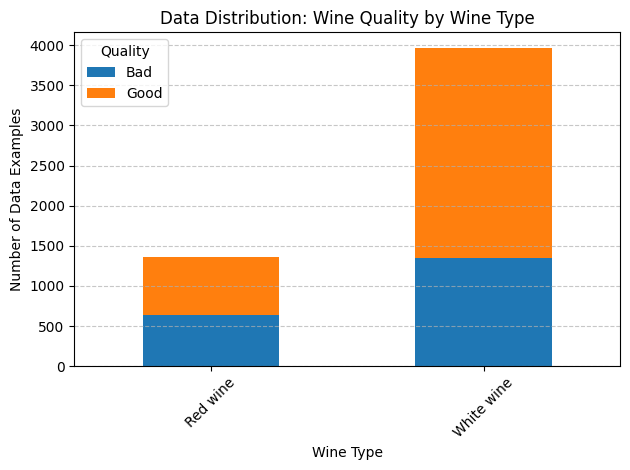

<Figure size 640x480 with 0 Axes>

In [11]:
#Visualize data distribution per wine type
wine_quality_view = wine_quality.copy()
wine_quality_view['wine_type'] = wine_quality_view['wine_type'].map(lambda wineT: 'Red wine' if wineT == 1 else 'White wine')
wine_quality_view['quality'] = wine_quality_view['quality'].map(lambda quality: 'Good' if quality >= 6 else 'Bad')
wine_type_examples = wine_quality_view.groupby(['wine_type', 'quality']).size().unstack(fill_value=0)

wine_type_examples.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Data Distribution: Wine Quality by Wine Type')
plt.xlabel('Wine Type')
plt.ylabel('Number of Data Examples')
plt.xticks(rotation=45)
plt.legend(title='Quality')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.clf()

In [12]:
X = wine_quality.drop(columns='quality').values
#y = wine_quality['quality'].values #(array([3, 4, 5, 6, 7, 8, 9]), array([  30,  206, 1752, 2323,  856,  148,    5]))

#Map to binary values for column "quality" as "good=1" (quality ≥ 6) or "bad=-1" (quality < 6)
y = np.where(wine_quality['quality'] >= 6, 1, -1) #1988, 3332

print(f'Wine unique values: {np.unique(y, return_counts=True)}')

Wine unique values: (array([-1,  1]), array([1988, 3332]))


#Observations on feature scaling
Some features (ex. residual sugar, free sulfur dioxide, total sulfur dioxide, ...) which have high difference between the minumum and maximum values, will need to be standardized on the same scale.
Especially in case of models that aim to find an optimal hyperplane (ex. SVM) that maximizes the margin between different classes. The calculation of this margin and the positioning of the hyperplane rely on the distances between data points in the feature space.

In [13]:
red_minMax_feature_values = zip(red_wine_quality.columns, red_wine_quality.min(), red_wine_quality.mean(), red_wine_quality.max())
print(f'Red wine Minimum/Mean/Maximum values for each feature: {list(red_minMax_feature_values)}')
white_minMax_feature_values = zip(white_wine_quality.columns, white_wine_quality.min(), white_wine_quality.mean(), white_wine_quality.max())
print(f'White wine Minimum/Mean/Maximum values for each feature: {list(white_minMax_feature_values)}')

Red wine Minimum/Mean/Maximum values for each feature: [('fixed acidity', 4.6, 8.31963727329581, 15.9), ('volatile acidity', 0.12, 0.5278205128205128, 1.58), ('citric acid', 0.0, 0.2709756097560976, 1.0), ('residual sugar', 0.9, 2.53880550343965, 15.5), ('chlorides', 0.012, 0.08746654158849279, 0.611), ('free sulfur dioxide', 1.0, 15.874921826141339, 72.0), ('total sulfur dioxide', 6.0, 46.46779237023139, 289.0), ('density', 0.99007, 0.9967466791744841, 1.00369), ('pH', 2.74, 3.3111131957473416, 4.01), ('sulphates', 0.33, 0.6581488430268917, 2.0), ('alcohol', 8.4, 10.422983114446529, 14.9), ('quality', 3.0, 5.6360225140712945, 8.0), ('wine_type', 1.0, 1.0, 1.0)]
White wine Minimum/Mean/Maximum values for each feature: [('fixed acidity', 3.8, 6.854787668436097, 14.2), ('volatile acidity', 0.08, 0.27824111882400976, 1.1), ('citric acid', 0.0, 0.33419150673744386, 1.66), ('residual sugar', 0.6, 6.391414863209474, 65.8), ('chlorides', 0.009, 0.04577235606369946, 0.346), ('free sulfur dioxi

In [14]:
minMax_feature_values = zip(wine_quality.columns, wine_quality.min(), wine_quality.mean(), wine_quality.max())
print(f'Minimum/Mean/Maximum values for each feature: {list(minMax_feature_values)}')

wine_good_quality = wine_quality.where(wine_quality['quality'] >= 6)
minMax_feature_values = zip(wine_good_quality.columns, wine_good_quality.min(), wine_good_quality.mean(), wine_good_quality.max())
print(f'Good Quality Minimum/Mean/Maximum values for each feature: {list(minMax_feature_values)}')

wine_bad_quality = wine_quality.where(wine_quality['quality'] < 6)
minMax_feature_values = zip(wine_bad_quality.columns, wine_bad_quality.min(), wine_bad_quality.mean(), wine_bad_quality.max())
print(f'Bad Quality Minimum/Mean/Maximum values for each feature: {list(minMax_feature_values)}')

Minimum/Mean/Maximum values for each feature: [('fixed acidity', 3.8, 7.215178571428571, 15.9), ('volatile acidity', 0.08, 0.3441296992481203, 1.58), ('citric acid', 0.0, 0.31849436090225564, 1.66), ('residual sugar', 0.6, 5.0484774436090225, 65.8), ('chlorides', 0.009, 0.056689849624060144, 0.611), ('free sulfur dioxide', 1.0, 30.036654135338345, 289.0), ('total sulfur dioxide', 6.0, 114.10902255639098, 440.0), ('density', 0.98711, 0.9945352988721804, 1.03898), ('pH', 2.72, 3.2246635338345864, 4.01), ('sulphates', 0.22, 0.5333571428571429, 2.0), ('alcohol', 8.0, 10.549241228070175, 14.9), ('quality', 3.0, 5.795676691729323, 9.0), ('wine_type', -1.0, -0.48909774436090225, 1.0)]
Good Quality Minimum/Mean/Maximum values for each feature: [('fixed acidity', 3.8, 7.141836734693877, 15.6), ('volatile acidity', 0.08, 0.3090561224489796, 1.04), ('citric acid', 0.0, 0.3283883553421369, 1.66), ('residual sugar', 0.7, 4.882412965186075, 65.8), ('chlorides', 0.012, 0.051354741896758704, 0.415), (

In [15]:
#Set a value in random_state to ensure reproducibility of data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f'shape {X_train.shape}\n', X_train)

shape (4256, 12)
 [[ 6.8   0.26  0.33 ...  0.44 10.5  -1.  ]
 [ 6.8   0.25  0.38 ...  0.59 10.2  -1.  ]
 [10.2   0.42  0.57 ...  0.63  9.6   1.  ]
 ...
 [ 6.4   0.26  0.42 ...  0.47  9.1  -1.  ]
 [10.5   0.39  0.46 ...  0.84 11.4   1.  ]
 [ 7.3   0.28  0.42 ...  0.43 10.7  -1.  ]]


#Apply StandardScaler
standard_scaler.fit_transform() is used to compute mean the mean (μ) and standard deviation (σ) for each feature on the training data and then to rescale the training data.
The testing data are directly rescaled through standard_scaler.transform() using the parameters computed on the training data.
Generally, We should avoid scaling categorical features, they have discrete values and by scaling makes them, their values become continuous, which can mislead the learning models by lossing the interpretability and the nature of the target feature.
#### Note that dimension scaling is always applied after dataset splitting, in order to avoid data leakage from training set to test set.

In [16]:
standard_scaler = preprocessing.StandardScaler()
#exclude 'wine_type' index from scaling
partial_X_train_standard = standard_scaler.fit_transform(X_train[:, :11])
partial_X_test_standard = standard_scaler.transform(X_test[:, :11])

#concatenate 'wine_type' index after scaling
X_train_standard = np.hstack((partial_X_train_standard, X_train[:, 11:]))
X_test_standard = np.hstack((partial_X_test_standard, X_test[:, 11:]))

#Manual standardization using numpy
# mean_val = np.mean(X_train, axis=0)
# std_val = np.std(X_train, axis=0)
# std_val[std_val == 0] = 1.0

# X_train_standard = (X_test - mean_val) / std_val
# X_test_standard = (X_test - mean_val) / std_val

#print(f'scaled X_train_standard instances:{X_train_standard}\n scaled X_test_standard intances:{X_test_standard}')
minMax_feature_values = zip(wine_quality.drop(columns='quality').columns, X_train_standard.min(axis=1), X_train_standard.max(axis=1))
print(f'Minimum/Maximum values for each feature: {list(minMax_feature_values)}')
print(f'shape {X_train_standard.shape}\n', X_train_standard)

Minimum/Maximum values for each feature: [('fixed acidity', np.float64(-1.0), np.float64(0.9381780229918787)), ('volatile acidity', np.float64(-1.0), np.float64(0.7268019259463089)), ('citric acid', np.float64(-1.8273259133543258), np.float64(2.266593384211851)), ('residual sugar', np.float64(-1.510261767785971), np.float64(1.962701769967871)), ('chlorides', np.float64(-1.3263225891919668), np.float64(1.137584149236235)), ('free sulfur dioxide', np.float64(-1.3990770272548017), np.float64(8.264440659773356)), ('total sulfur dioxide', np.float64(-1.5597163204441749), np.float64(1.1926703891789439)), ('density', np.float64(-1.0919976609714168), np.float64(1.1422348194826384)), ('pH', np.float64(-1.4929146110942604), np.float64(0.25537067629674454)), ('sulphates', np.float64(-0.7961985529363579), np.float64(2.4814574943919676)), ('alcohol', np.float64(-1.0), np.float64(0.9615076819384121)), ('wine_type', np.float64(-1.3643305375469041), np.float64(0.2976580328266115))]
shape (4256, 12)
 [

#Should we apply PCA?

To extract only important features and reduce the dimensionality, therefore reducing the traing cost.
It could be needed, if we notice overfitting caused by irrelevant features.
Generally, in our case since we've already aforementioned that in our case the samples-to-features ratio is high, we don't need to reduce the number of dimensions. But just for an experiment we can try it. [it might be useful in case of further noticed overfitting!]

In [ ]:
#importlib.reload(PCA_Module) # in case of manual updates on colab

pca = PCA(0.85) #85% gives us 6 features, meanwhile 90% of variance gives use 8 features
pca.fit(X_train_standard)

transformed_X_train_standard = pca.transform(X_train_standard)
transformed_X_test_standard = pca.transform(X_test_standard)

print(f'transformed X_train shape {transformed_X_train_standard.shape}\n', transformed_X_train_standard)
print(f'transformed X_test shape {transformed_X_test_standard.shape}\n', transformed_X_test_standard)

explained variance per comp. idxs[0 1 2 3 8 9]: [3.63133529 2.48334646 1.59109269 0.93734208 0.7444982  0.62646689]
explained variance ratio per comp. idxs[0 1 2 3 8 9]: [0.30846928 0.21095163 0.13515778 0.07962394 0.06324253 0.05321618]
transformed X_train shape (4256, 6)
 [[-1.47951127 -0.38046635 -0.30523229  0.13607761  0.96859456 -0.04236056]
 [-0.70705619  0.49253987  0.30440302  0.53786682 -0.78855677  0.58848193]
 [ 2.82520092  1.50857749 -2.55294943 -0.98976595 -0.31057844  0.71635078]
 ...
 [-1.2614114   1.24147684  0.30436017 -0.33248839 -0.14149082  0.85589743]
 [ 3.0390907   0.73452947 -2.73729087  0.2760119  -0.67316978 -0.76090439]
 [-1.03097199 -0.79798878 -0.9180024  -0.17954283  0.36714052  0.44658363]]
transformed X_test shape (1064, 6)
 [[-2.16779539  1.39917207  0.45937885  0.53831434  0.22963764  0.59687998]
 [-0.97651081 -0.20060253  0.78499306  0.05416821  0.08463279  1.6642136 ]
 [ 1.87976452  0.04080366  0.52339641 -0.96796637  0.12396409  0.0990446 ]
 ...
 [-

#SVM
Support vector machine aims to find an optimal hyperplane that best separates different classes in a dataset. The optimal hyperplane is the one that has the maximizied margin to the nearest training data points (support vectors) of any class.
For linearly separable data, there might be many possible hyperplanes that can separate the classes. And it'll be quite feasibile to find the optimal hyperplane.
For non-linearly separable date, we can introduce a generic approach which works also in case of linearity by exploiting the unconstrainted weights/bias update which uses:
<!-- * Margin score yi​(wTxi​+b): (score ​<1 : in case of correctly classified data point), (score​ ≥1 : in case of misclassified data point). -->
* Regularization parameter λ: A higher value of λ increases the cost of misclassifications, forcing the algorithm to try harder to classify all training points correctly,
even if it means a smaller margin. This can lead to a smaller margin and potentially overfitting if λ is too large.  
A lower value of λ decreases the cost of misclassifications, allowing the algorithm to have a larger margin,
even if it misclassifies some training points. This can lead to underfitting if λ is too small.

* The learning rate σ aims to adjust the weights and bias (determines how big of a step the algorithm takes in the direction opposite to the gradient) trying to reach the approximated convergence to the the optimal decision boundary.

The gradient descent strategy can be stocastic or batch: In our case we use the batch strategy in order to avoid the noisy updates in case of SGD.

Acc.:0.7180451127819549


<Figure size 640x480 with 0 Axes>

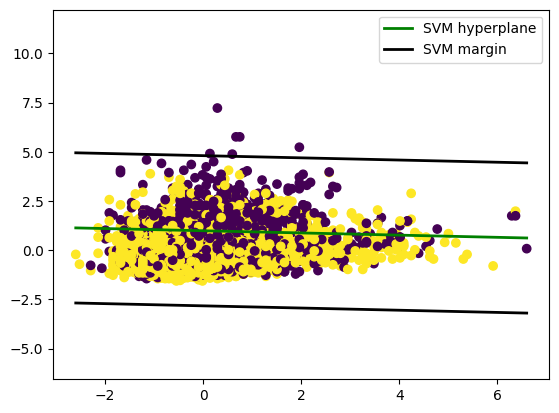

              precision    recall  f1-score   support

     bad[-1]       0.66      0.52      0.58       398
     good[1]       0.74      0.84      0.79       666

    accuracy                           0.72      1064
   macro avg       0.70      0.68      0.68      1064
weighted avg       0.71      0.72      0.71      1064



In [17]:
#importlib.reload(SVM_Module) # in case of manual updates on colab

#svm = SVM("SGD")
svm = SVM(n_iterations=1500)
# svm.fit(transformed_X_train_standard, y_train)
# predictions = svm.predict(transformed_X_test_standard)
svm.fit(X_train_standard, y_train, X_validation=X_test_standard, y_validation=y_test)
predictions = svm.predict(X_test_standard)
#svm.fit(X_train, y_train)
#predictions = svm.predict(X_test)

accuracy = np.sum(predictions == y_test) / len(y_test)
print(f'Acc.:{accuracy}')

#print(inspect.signature(svm.visualize_svm))

svm.visualize_svm(np.vstack((X_train_standard, X_test_standard)), np.concatenate((y_train, y_test)))
# print(svm.weights)
# print(svm.bias)
print(classification_report(y_test, predictions, target_names=['bad[-1]', 'good[1]']))

#Logistic Regression
It seeks to find a logaritmic equation(sigmoid) that best describes how one or more independent variables (features)
relate to a dependent variable (target label).
The model aims to find the "best-fit" approximated hyperplane that minimizes the gradient(not exact value predictor "based on a predefined threshold").
It squashes any real-valued number into a value between 0 and 1, which can be interpreted as a probability: σ(z)= 1 / (1+e^−z)

The learning rate σ aims to adjust the weights and bias (determines how big of a step the algorithm takes in the direction opposite to the gradient) trying to reach the approximated convergence to the optimal decision boundary.

Acc.:0.6597744360902256


<Figure size 640x480 with 0 Axes>

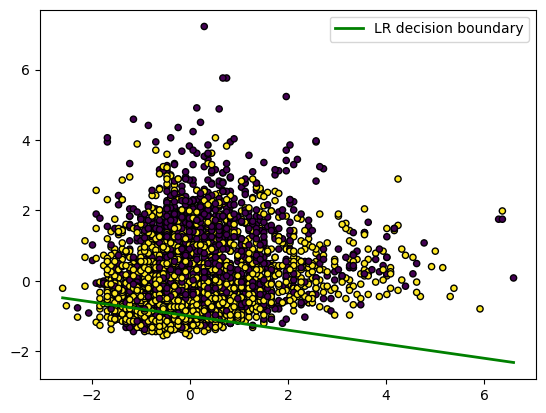

              precision    recall  f1-score   support

     bad[-1]       0.53      0.84      0.65       398
     good[1]       0.86      0.55      0.67       666

    accuracy                           0.66      1064
   macro avg       0.69      0.70      0.66      1064
weighted avg       0.73      0.66      0.66      1064



In [18]:
#importlib.reload(LogisticRegression_Module) # in case of manual updates on colab

lr = LogisticRegression()
# lr.fit(transformed_X_train_standard, y_train)
# predictions = lr.predict(transformed_X_test_standard)
lr.fit(X_train_standard, y_train, X_validation=X_test_standard, y_validation=y_test)
predictions = lr.predict(X_test_standard)
#lr.fit(X_train, y_train)
#predictions = lr.predict(X_test)

accuracy = np.sum(predictions == y_test) / len(y_test)
print(f'Acc.:{accuracy}')

#print(inspect.signature(lr.visualize_svm))

lr.visualize_lr(np.vstack((X_train_standard, X_test_standard)), np.concatenate((y_train, y_test)))
#print(lr.weights)
#print(lr.bias)
print(classification_report(y_test, predictions, target_names=['bad[-1]', 'good[1]']))

#Hyperparameter tuning
We'll try to apply k-fold cross validation on the logistic regression since it has a lower accuracy compared to SVM w.r.t. default hyperparameters per each predictor.
Let's break down the hyperparameters of logistic regression:
* Learning rate σ: the most common values of σ are [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]. If we choose define too high σ, we'll see a huge loss because of extremely large steps taken in weight updates. On the other hand, if we choose define too low σ, we'll have tiny steps taken in weight updates, leading to extremely slow convergence.  
Therefore, in our hyperparameter-tuning experience, we might need to tune only [0.001, 0.01, 0.1] since the other values are used for wider search.

* Number of iterations (epochs): the most common values of n.epochs are [50, 100, 200, 500, 1000, 2000].  
It's known that the number of epochs is the iterations taken to update weights till reaching an approximated optimal boundary decision.
High number of epochs might need lower number of learning rate that need to be proportionally adequate to the the step size * number of steps to take, in order to update the weights.  
So in our hyper-parameter tuning experience, we might need to tune only [100, 200, 500] w.r.t. the an inversely related σ, given our mid-sized training set.
So if our chosen learning rate is high, each step taken by the predictor is large, we might reach the vicinity of the boundary faster, potentially needing fewer epoch. And viceversa, if our chosen learning rate is low, each step is small. The predictor will approach the boundry more stably and slowly, but it will require a much higher number of epochs to reach convergence.
* Threshold: this number determines the separation between the probabilities of targert classes, the default values (0.50) indicates the total equality while defining the finale predication. Infact, it's conditioned to [(y_predicted >= threshold) then 1, -1 otherwise].  
We can notice that the precision ratio of the minor class ["bad" -1] in our previous prediction is pretty low w.r.t. SVM's precision ratio in case of the same class. Which indicates lower correct classification of positive examples.  
Meanwhile the recall of the same class is noticeably higher, which indicates that we have fewer examples of false negative predictions.  
Subsequently, since we're in case of imbalanced data distribution among classes, we'd need to balance the threshold in order to predict more correct positives in case of the minor class ["bad" -1]. The threshold will need to be tuned with lower values than the default one w.r.t. the minor class presence in the dataset.
* Lambda/regularization parameter λ: initially for simplicity we would set it to 0. Then if we notice any type of overfitting caused by irregular weights, we'll start tuning it w.r.t. σ, threshold and n_iterations.

In [19]:
#importlib.reload(LogisticRegression_Module) # in case of manual updates on colab
import itertools
possibile_values ={'learning_rate': [0.001, 0.01, 0.1],
 'lambda_param': [0.001, 0.01, 0.1],
 'n_iterations': [100, 200, 500, 1000],
 'threshold': [0.5, 0.4, 0.35, 0.30, 0.25]
}
keys = possibile_values.keys()
values = possibile_values.values()

lr_params = [dict(zip(keys, combination)) for combination in itertools.product(*values)]

# lr_params =  [{'learning_rate':0.001, 'lambda_param': 0.000, 'n_iterations':500, 'threshold':0.37},
#               {'learning_rate':0.01, 'lambda_param': 0.000, 'n_iterations':200, 'threshold':0.37},
#               {'learning_rate':0.1, 'lambda_param': 0.000, 'n_iterations':100, 'threshold':0.37},
#               {'learning_rate':0.001, 'lambda_param': 0.000, 'n_iterations':500, 'threshold':0.31},
#               {'learning_rate':0.01, 'lambda_param': 0.000, 'n_iterations':200, 'threshold':0.31},
#               {'learning_rate':0.1, 'lambda_param': 0.000, 'n_iterations':100, 'threshold':0.31},
#               {'learning_rate':0.001, 'lambda_param': 0.000, 'n_iterations':500, 'threshold':0.37},
#               {'learning_rate':0.01, 'lambda_param': 0.000, 'n_iterations':200, 'threshold':0.34},
#               {'learning_rate':0.1, 'lambda_param': 0.000, 'n_iterations':100, 'threshold':0.31}]


kcv_lr = KCrossValidation(model_class=LogisticRegression)
paired_scores = kcv_lr.evaluate_params_combinations(X=X_train_standard, y=y_train, model_params_list=lr_params)

scores = sorted(zip(range(len(paired_scores)), [score[1] for score in paired_scores]), key=lambda x: x[1], reverse=True)
maximized_tuned_lr_parms = lr_params[scores[0][0]]
print(f'Maximized acc. tuned params{maximized_tuned_lr_parms}, acc. {scores[0][1]}')


Fold 1/5 for params [learning_rate:0.001,lambda_param:0.001,n_iterations:100,threshold:0.5] - Score: 0.6408
Fold 2/5 for params [learning_rate:0.001,lambda_param:0.001,n_iterations:100,threshold:0.5] - Score: 0.6357
Fold 3/5 for params [learning_rate:0.001,lambda_param:0.001,n_iterations:100,threshold:0.5] - Score: 0.6592
Fold 4/5 for params [learning_rate:0.001,lambda_param:0.001,n_iterations:100,threshold:0.5] - Score: 0.6522
Fold 5/5 for params [learning_rate:0.001,lambda_param:0.001,n_iterations:100,threshold:0.5] - Score: 0.6533
Fold 1/5 for params [learning_rate:0.001,lambda_param:0.001,n_iterations:100,threshold:0.4] - Score: 0.6256
Fold 2/5 for params [learning_rate:0.001,lambda_param:0.001,n_iterations:100,threshold:0.4] - Score: 0.6381
Fold 3/5 for params [learning_rate:0.001,lambda_param:0.001,n_iterations:100,threshold:0.4] - Score: 0.6263
Fold 4/5 for params [learning_rate:0.001,lambda_param:0.001,n_iterations:100,threshold:0.4] - Score: 0.6369
Fold 5/5 for params [learnin

#Re-train Logistic regression with tuned hyperparameters

Acc.:0.7255639097744361


<Figure size 640x480 with 0 Axes>

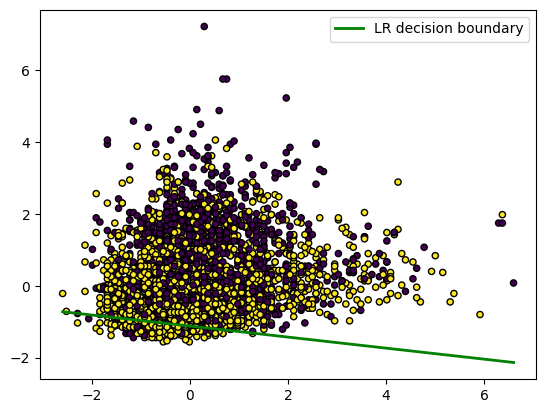

              precision    recall  f1-score   support

     bad[-1]       0.65      0.59      0.62       398
     good[1]       0.77      0.81      0.79       666

    accuracy                           0.73      1064
   macro avg       0.71      0.70      0.70      1064
weighted avg       0.72      0.73      0.72      1064



In [21]:
lr = LogisticRegression(**maximized_tuned_lr_parms)
# lr.fit(transformed_X_train_standard, y_train)
# predictions = lr.predict(transformed_X_test_standard)
lr.fit(X_train_standard, y_train, X_validation=X_test_standard, y_validation=y_test)
predictions = lr.predict(X_test_standard)
#lr.fit(X_train, y_train)
#predictions = lr.predict(X_test)

accuracy = np.sum(predictions == y_test) / len(y_test)
print(f'Acc.:{accuracy}')

#print(inspect.signature(lr.visualize_svm))

lr.visualize_lr(np.vstack((X_train_standard, X_test_standard)), np.concatenate((y_train, y_test)))
#print(lr.weights)
#print(lr.bias)
print(classification_report(y_test, predictions, target_names=['bad[-1]', 'good[1]']))

#Analysis of misclassified examples

Since we have tuned only the standard logistic regression. So we shall focalize on its performance.
Even after hyperparameter tuning, the "bad" class (minor class with recall 0.63, precision 0.64 and f1-score with almost the same value before tuning [0.63 => 0.65]) is harder to predict than the "good" class (major class with recall 0.79, precision 0.78 and f1-score with higher value [0.67 => 0.78]). In other words, the hyperparameter tuning is baised towards the major class. For these possibile reasons:
* Class imbalance (most probable): since the ratio of support between "bad" and "good" classes is (1 : 1.67) which reflects the lower number of training examples for the "bad" class.
Logistic Regression and general standard ML models are designed to optimize the overall accuracy or minimize a loss function by updating weights and bais values treating all errors equally; so in the scenario of imbalance classes, the major class performes more updates w.r.t. the minor one.
* Insufficient class complexity: the minor class doesn't have significant (or unique) features that can reflect a significant variance to weight/bias updates w.r.t. the major one. Infact as seen above (ref. Observations on feature scaling) the minor class (bad quality) shares almost all features' values with the major class (good quality) with exception to higher volatile acidity, citric acid and notable higher values of sulfur dioxides. This shows us how the datapoints of our two class are overlapping.
* Logistic regression linearity: Since LR is a linear model, it suffers to find a linear decision boundary (especially in our case of interleaving datapoints of different classes, since there's no linear separability for the minor class features).
* Possibile noisy datapoints that make the minor class interleave with the major one, resulting a baised prediction towards the major class.

#Kernelized SVM
Non-linear kernels are generally used when we notice that that datapoints of different classes are not linearly serparable, such that there exists an extreme overlapping between classes' data points w.r.t. the original dimensions. Interleaved patterns between classes (non-linear separability) makes it difficult for linear models to find the appropriate decision boundry.
The kernel trick introduces the mapping from the original feature space ϕ of datapoint x to a higher dimensional space exploiting a kernel function `K(x_i,x_j)=ϕ(x_i)⋅ϕ(x_j)`, aiming to find an appropriate decision boundary in the higher dimensional space.
The kernel function to choose depends the prior knowlege of data distribution; in case of no prior knowlege, the gaussian kernel is the most common kernel.

### In case of KSVM
* Training:  
  * Calculate the kernel matrix on the training set through K(X, X) using a predefined kernel function.
  * Resolve the QP problem to determine alpha vector such that 0 <= alpha_i <= regularization term w.r.t. the kernel matrix.
  * Determine labeled support vectors SV w.r.t. the resolved alphas. To avoid SV with α = 0, a common lower threshold should be applied (ex. 0.00001). The maximized margin SV shouldn't exceed the regularization term.
  * Calculate the bias term as `bias = y_k -∑i∈SV * α_i * y_i * K(x_i, x_k)` for such a support vector (x_k,y_k) w.r.t.  any support vectors x_i.

* Prediction:  
To classify a new data point x_test, the decision function is calculated through:
`f(x_test) =∑i∈SV * α_i * y_i * K(x_i, x_test) + bias` where SV refers to the support vectors determined in the training phase, α_i is the alpha multiplier associated to a support vector data point x_i.
The kernel function f(x_test) is used to measure similarity score between the test point and each support vector.
Then we use the sign function (as used in the standard SVM) to predict -1 or 1.

In [ ]:
#importlib.reload(SVM_Module) # in case of manual updates on colab
#importlib.reload(Kernel_Module) # in case of manual updates on colab

print('-----------------------------------gaussian kernel on SVM-----------------------------------')
ksvm = SVM(kernel=Kernel(X_train_standard))
# ksvm.fit(transformed_X_train_standard, y_train)
# predictions = ksvm.predict(transformed_X_test_standard)
ksvm.fit(X_train_standard, y_train)
predictions = ksvm.predict(X_test_standard)
#ksvm.fit(X_train, y_train)
#predictions = ksvm.predict(X_test)

accuracy = np.sum(predictions == y_test) / len(y_test)
print(f'Acc.:{accuracy}')

print(classification_report(y_test, predictions, target_names=['bad[-1]', 'good[1]']))

-----------------------------------gaussian kernel on SVM-----------------------------------
     pcost       dcost       gap    pres   dres
 0: -9.8066e+02 -2.7261e+02  3e+04  2e+02  1e-15
 1: -2.0222e+02 -1.1972e+02  2e+03  1e+01  1e-15
 2: -3.5713e+01 -9.8426e+01  1e+02  4e-01  3e-15
 3: -3.0287e+01 -4.4554e+01  1e+01  3e-15  2e-15
 4: -3.1047e+01 -3.4361e+01  3e+00  6e-16  9e-16
 5: -3.1402e+01 -3.2057e+01  7e-01  3e-16  9e-16
 6: -3.1528e+01 -3.1704e+01  2e-01  2e-16  9e-16
 7: -3.1566e+01 -3.1614e+01  5e-02  2e-16  8e-16
 8: -3.1577e+01 -3.1592e+01  2e-02  2e-16  8e-16
 9: -3.1580e+01 -3.1585e+01  5e-03  1e-16  8e-16
10: -3.1582e+01 -3.1583e+01  9e-04  5e-16  9e-16
11: -3.1582e+01 -3.1582e+01  1e-04  3e-16  8e-16
12: -3.1582e+01 -3.1582e+01  2e-05  1e-16  8e-16
Optimal solution found.
Acc.:0.6259398496240601
              precision    recall  f1-score   support

     bad[-1]       0.00      0.00      0.00       398
     good[1]       0.63      1.00      0.77       666

    accura

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#importlib.reload(SVM_Module) # in case of manual updates on colab
#importlib.reload(Kernel_Module) # in case of manual updates on colab

print('-----------------------------------polynomial kernel on SVM-----------------------------------')
ksvm = SVM(kernel=Kernel(X_train_standard, kernal_func=Kernel.polynomial_kernel))
# ksvm.fit(transformed_X_train_standard, y_train)
# predictions = ksvm.predict(transformed_X_test_standard)
ksvm.fit(X_train_standard, y_train)
predictions = ksvm.predict(X_test_standard)
#ksvm.fit(X_train, y_train)
#predictions = ksvm.predict(X_test)

accuracy = np.sum(predictions == y_test) / len(y_test)
print(f'Acc.:{accuracy}')

print(classification_report(y_test, predictions, target_names=['bad[-1]', 'good[1]']))

-----------------------------------polynomial kernel on SVM-----------------------------------
     pcost       dcost       gap    pres   dres
 0: -1.2601e+03 -1.0510e+02  4e+04  2e+02  1e-10
 1: -4.4222e+01 -1.0436e+02  9e+02  4e+00  2e-10
 2: -2.1885e+01 -8.7846e+01  2e+02  7e-01  4e-11
 3: -1.7033e+01 -6.8297e+01  8e+01  2e-01  1e-11
 4: -1.6539e+01 -4.9135e+01  4e+01  7e-02  6e-12
 5: -1.7993e+01 -2.8862e+01  1e+01  1e-02  2e-12
 6: -1.9472e+01 -2.3823e+01  5e+00  5e-03  2e-12
 7: -1.9656e+01 -2.3375e+01  4e+00  3e-03  2e-12
 8: -2.0176e+01 -2.2126e+01  2e+00  1e-03  4e-12
 9: -2.0546e+01 -2.1337e+01  8e-01  4e-04  7e-12
10: -2.0663e+01 -2.1098e+01  4e-01  1e-04  3e-12
11: -2.0768e+01 -2.0919e+01  2e-01  4e-05  6e-12
12: -2.0811e+01 -2.0851e+01  4e-02  7e-06  6e-12
13: -2.0823e+01 -2.0833e+01  1e-02  9e-07  4e-12
14: -2.0827e+01 -2.0828e+01  1e-03  1e-07  2e-12
15: -2.0828e+01 -2.0828e+01  4e-05  3e-09  5e-12
16: -2.0828e+01 -2.0828e+01  8e-07  5e-11  3e-12
Optimal solution found.


#Notes on the difference between applying gaussian kernel and polynomial kernel on SVM
As noticed the gaussian-based KSVM has 0 performance for the minor class `bad[-1]` which means that gaussian-based KSVM has a generalization problem in case of imbalanced dataset; in essence, the gaussian-based KSVM suffers from high-class influence based on:
* Each support vector in the gaussian-based KSVM effectively creates a "bubble" of influence around itself. The decision boundary is formed by the combination of these bubbles.

* In an imbalanced dataset, if the minority class points are sparse, a gaussian kernel will struggle to connect these isolated points to form a cohesive decision boundary for the entire minority class; therfore, the dense majority class might dominate the decision space.

* Gamma Sensitivity: If gamma is too high, the bubbles are very small, and minority class points become even more isolated. If gamma is too low, the kernel becomes more linear. So it needs to be carefully tuned.

Meanwhile the polynomial-based KSVM has more global influence:
* Polynomial kernel can a generate broader by sweeping decision surfaces that can span larger areas of the feature space.

* The nature of connecting sparse points allows it to draw a more general boundary that can encompass the more sparsely distributed minority class points, even if they are not tightly clustered. It's less sensitive to the immediate density around individual points.

#Kernelized Logistic Regression
* Training:  
  * Calculate the kernel matrix on the training set through K(X, X) using a predefined kernel function.
  * For a specific number of epochs:
    * Find the sigmoid predition scores based on `∑i∈N K(x_i, x_i) * α_i + bias`
    * Continue updating alphas using the gradient descent based on K.
    * Continue updating bias using the gradient descent based on training error w.r.t. the real scores.

* Prediction:  
To classify a new data point x_test, the decision function is calculated through:
`f(x_test) = ∑i∈N α_i * K(x_i, x_test) + bias` where N refers to the number of trained examples, α_i is the alpha multiplier associated to a trained example x_i.
The kernel function f(x_test) is used to measure similarity score between the test point and each trained data point.
Then we use the threholded sigmoid function (as used in the standard LR) to predict -1 or 1.

In [ ]:
#importlib.reload(LogisticRegression_Module) # in case of manual updates on colab
dataset_percent = 1.0 #0.5 #mini-batch, in order to reduce the training and validation time
X_train_indices = np.arange(X_train_standard.shape[0])
X_test_indices = np.arange(X_test_standard.shape[0])
np.random.shuffle(X_train_indices)

n_training_samples = int(dataset_percent *  X_train_standard.shape[0])
n_test_samples = int(dataset_percent *  X_test_standard.shape[0])

X_train_standard_indices = X_train_indices[:n_training_samples]
X_test_standard_indices = X_test_indices[:n_test_samples]


print('-----------------------------------gaussian kernel on LR-----------------------------------')
gklr = LogisticRegression(lambda_param=0, n_iterations=50, kernel=Kernel(X_train_standard[X_train_standard_indices], kernal_func=Kernel.gaussian_kernel))
# gklr.fit(transformed_X_train_standard, y_train)
# predictions = gklr.predict(transformed_X_test_standard)
gklr.fit(X_train_standard[X_train_standard_indices], y_train[X_train_standard_indices], X_validation=X_test_standard[X_test_standard_indices], y_validation=y_test[X_test_standard_indices])
predictions = gklr.predict(X_test_standard[X_test_standard_indices])
#gklr.fit(X_train, y_train)
#predictions = gklr.predict(X_test)

accuracy = np.sum(predictions[X_test_standard_indices] == y_test[X_test_standard_indices]) / len(y_test[X_test_standard_indices])
print(f'Acc.:{accuracy}')

print(classification_report(y_test[X_test_standard_indices], predictions[X_test_standard_indices], target_names=['bad[-1]', 'good[1]']))

-----------------------------------gaussian kernel on LR-----------------------------------
Acc.:0.33962264150943394
              precision    recall  f1-score   support

     bad[-1]       0.34      1.00      0.51        72
     good[1]       0.00      0.00      0.00       140

    accuracy                           0.34       212
   macro avg       0.17      0.50      0.25       212
weighted avg       0.12      0.34      0.17       212



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#importlib.reload(LogisticRegression_Module) # in case of manual updates on colab

print('-----------------------------------polynomial kernel on LR-----------------------------------')
pklr = LogisticRegression(lambda_param=0, n_iterations=50, kernel=Kernel(X_train_standard[X_train_standard_indices], kernal_func=Kernel.polynomial_kernel))
# pklr.fit(transformed_X_train_standard, y_train)
# predictions = pklr.predict(transformed_X_test_standard)
pklr.fit(X_train_standard[X_train_standard_indices], y_train[X_train_standard_indices], X_validation=X_test_standard[X_test_standard_indices], y_validation=y_test[X_test_standard_indices])
predictions = pklr.predict(X_test_standard[X_test_standard_indices])
#pklr.fit(X_train, y_train)
#predictions = pklr.predict(X_test)

accuracy = np.sum(predictions[X_test_standard_indices] == y_test[X_test_standard_indices]) / len(y_test[X_test_standard_indices])
print(f'Acc.:{accuracy}')

print(classification_report(y_test[X_test_standard_indices], predictions[X_test_standard_indices], target_names=['bad[-1]', 'good[1]']))

-----------------------------------polynomial kernel on LR-----------------------------------
Acc.:0.6226415094339622
              precision    recall  f1-score   support

     bad[-1]       0.46      0.71      0.56        72
     good[1]       0.79      0.58      0.67       140

    accuracy                           0.62       212
   macro avg       0.63      0.64      0.61       212
weighted avg       0.68      0.62      0.63       212



#Kernelization's consequences on prediction and performance.

* Prediction:  
  * The prediction phase becomes more complex and time consuming since it needs to calculate the test kernel matrix:
    * In case of KSVM: K(X_test, SV) based on the predefined support vectors.
    * In case of KLR: K(X_test, X_training) based on the pre-stored training set.  

    It also uses the alpha vector and the bias term pre-calculated in the training phase, in order to give a prediction.
  * Since the non-linear boundaries can be very complex. This increases the model's capacity to fit more the training data.
  This also increases the risk of overfitting if the kernel-specific hyperparameters in additional to normal model's hyperparameters are not tuned correctly.

* Performance:
  * Increased Time Complexity:
    - The Computation of Kernel Matrix: The most significant bottleneck during training is the computation of the kernel matrix to be defined in the training phase, which is an N×N matrix where N is the number of training samples. Each entry K_i_j requires a kernel evaluation. This leads to an O(N^2 * D) complexity for constructing the matrix. For large datasets, N^2 grows very quickly, making kernelized models much slower than linear models.

    - Alpha multipliers (α) calculation:
      * In case of KSVM:  Quadratic Programming (QP) Solver: Solving the underlying QP problem to find the optimal alphas also typically scales between O(N^2) and O(N^3) which depends heavily on the size N of the training set.
      * In case of KLR: Iteratively re-weighted the gradient descent to update α which essentially involves operations on the N×N kernel matrix, leading to training complexities O(N^2 * n_epochs).

    - Additional Hyperparameter Tuning: Kernelized models introduce more hyperparameters to be tuned (ex. gamma, degree, ...) that need extensive tuning w.r.t. the chosen kernel function. Each combination requires retraining the entire model, multiplying the training time significantly for each time we need to tune a single combination of hyperparameters.
  * Increased Space Complexity:
    - Storing the N×N kernel matrix during training requires O(N^2) memory, which can quickly become a challenge for large datasets.

    - In case of KSVM: The trained model needs to store all support vectors SV(and their associated α and labels) for prediction, leading to O(Nsv * D) memory consumption for the model itself, for the dimension space D.
    - In case of KLR: The whole training K matrix needs to be preserved also for the prediction phase, occupying the memory always with additional O(N^2).

#Comparison between standard model and kernelized model
  * The created non-linear decision boundary in the original input space, allows predictor to model complex relationships in data that would be impossible with a simple linear model.
  
  * Unlike a linear model, where the weight vector directly tells us the importance and direction of each feature, a kernerlized decision boundary is defined by a weighted sum of kernel evaluations with training K matrix (or support vectors in case of SVM). Which makes it much harder to interpret the direct relationship between input features and the decision boundary.
  * Standard model may underfit if the data truly requires a non-linear boundary, since it won't handle the underlying relationship between features and labels. Meanwhile a kernelized model may overfit if the hyperparameters aren't well-tuned given the high dimensionality mapping.
  * The phase of hyperparameter tuning in kernelized models is relatively high w.r.t. the standard ones. It needs extensive tuning w.r.t. the chosen kernel function retraining the entire model over the high-dimensional mapped datapoints. Which introduces a real challange for large-sized datasets.

#Performance plot

In [ ]:
'''
model_evaluation should contain loss, val_loss, accuracy, val_accuracy
'''
def performance_plot(model_evaluation:dict):
    plt.figure(figsize=(16, 6))

    #plot loss
    plt.subplot(1, 2, 1)
    plt.plot(model_evaluation['loss'])
    plt.plot(model_evaluation['val_loss'])
    plt.ylabel('loss', size=12)
    plt.xlabel('epoch', size=12)
    plt.legend(['training', 'validation'])

    #plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(model_evaluation['accuracy'])
    plt.plot(model_evaluation['val_accuracy'])
    plt.ylabel('accuracy', size=12)
    plt.xlabel('epoch', size=12)
    plt.legend(['training', 'validation'])

    plt.show()

# Notes to observe overfitting and underfitting in loss/accuracy plots

Generally, we desire that the loss decreases over epochs, and accuracy increases over epochs. Indicating that the model is learning.

* Loss plot:
  - Both training & validation loss decreasing with almost consistent small gap, means that our model is learning and improving its fit to the data, and it's also generalizing well to unseen data. Then the loss curves tends to get flatten/stabilized indicating the convergence towards the suboptimal decision boundary.
  - Large oscillations/spikes (zig-zags) are a sign of instability of learning caused by missing hyperparameter tuning important for weights update step (ex. λ or σ) or noisy updates caused by the mini-batch/SGD.
  - Flat line especially for training phase, indicates an extreme underfitting that the model is not learning anything and doesn't make correct weights/bias updates.
  - Increasing gaps between training & validation loss curves, at any certain point indicates a possibile overfitting on unseen data. (the validation loss curve gets higher than the training loss curve).
  - Large consistent and high-value gaps between training & validation loss curves, at any certain point indicates a possibile underfitting on both training and validation data.
* Accuracy plot:
  - Both training & validation loss increasing with almost consistent small gap, means that our model is learning and improving its fit to the data, and it's also generalizing well to unseen data. Then the accuracy curves tends to get flatten/stabilized indicating the convergence towards the suboptimal decision boundary.
  - Large oscillations/spikes (zig-zags) are a sign of instability of learning caused by missing hyperparameter tuning important for weights update step (ex. λ or σ) or noisy updates caused by the mini-batch/SGD.
  - Flat line especially for training phase, indicates an extreme underfitting that the model is not learning anything and doesn't make correct predictions.
  - Increasing gaps between training & validation loss curves, at any certain point indicates a possibile overfitting on unseen data. (the validation accuracy curve gets lower than the training accuracy curve).
  - Large consistent and low-value gaps between training & validation loss curves, at any certain point indicates a possibile underfitting on both training and validation data.

#SVM Performance Evaluation

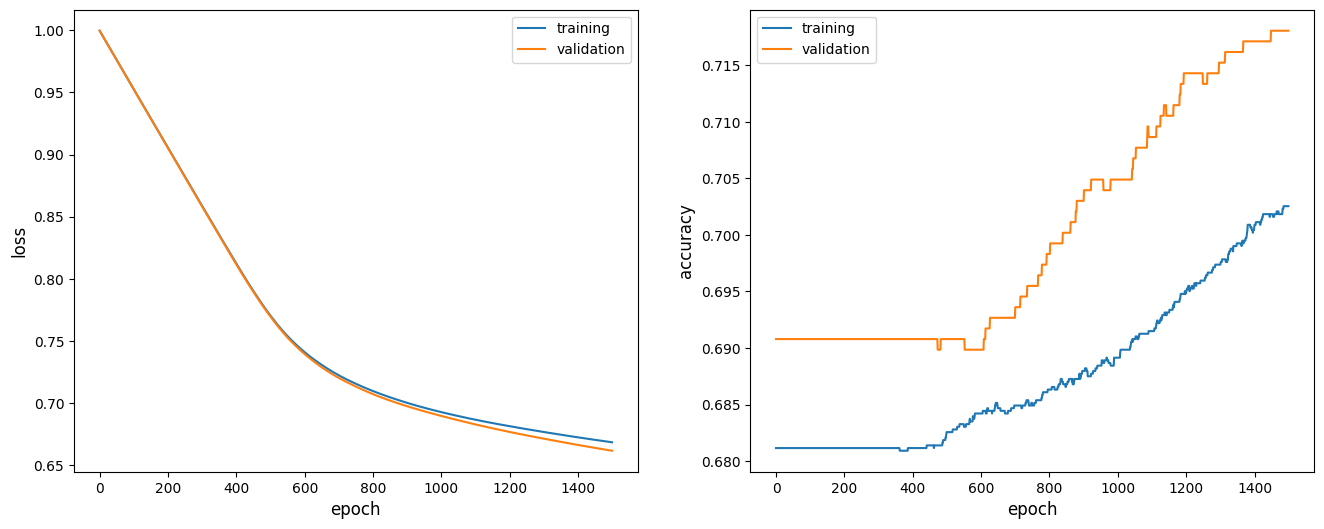

In [ ]:
performance_plot(svm.get_model_metrics_evaluation())

* In the loss plot: the loss curves are in a decreasing similar order, till approximated convergence w.r.t. the end of training phase (the validation curve even gets lower). This scenario indicates healthy learning phase w.r.t. the loss plot.
* In the accuracy plot: the validation curve is higher than the training one, and both are in an increasing order. This scenario indicates healthy learning phase which reflects correct predictions w.r.t. the accuracy plot.

# LR Performance Evaluation

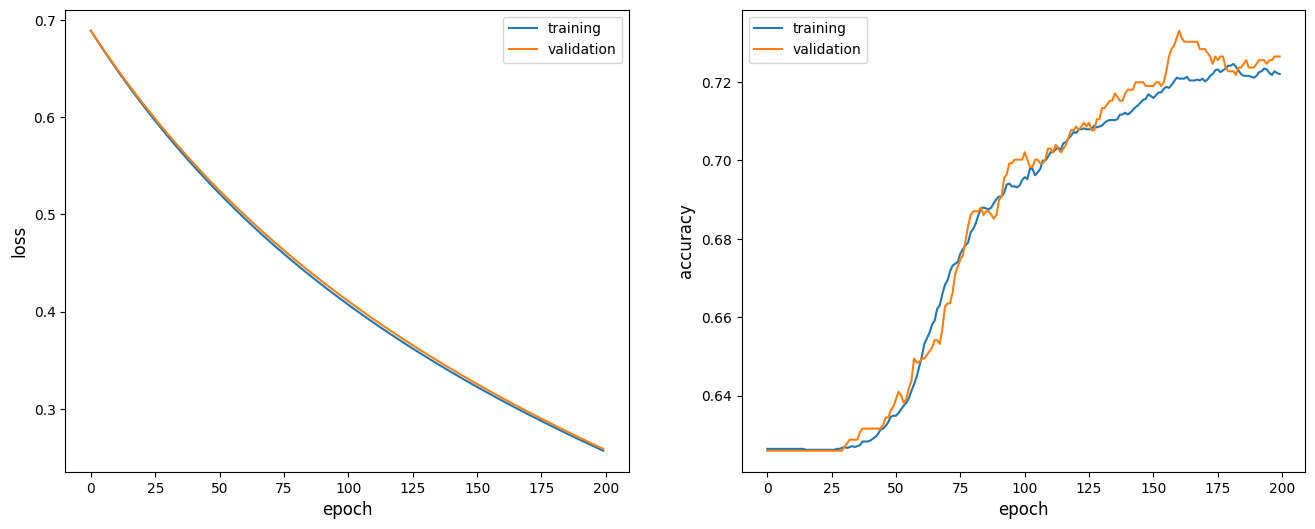

In [ ]:
performance_plot(lr.get_model_metrics_evaluation())

* In the loss plot: the loss curves are in a decreasing similar order, till approximated convergence w.r.t. the end of training phase. This scenario indicates healthy learning phase w.r.t. the loss plot.
* In the accuracy plot: the training curve in several epochs get higher than the validation one (or in other words, the validation curve suffers from some oscillations within epochs before the 175th epoch), and both are in an increasing order which indicate and acceptable learning phase. But the oscillations in the validation curve indicate the suffering of the model to predict unseen datapoints (overfitting).

#Gaussian KLR performance Evaluation

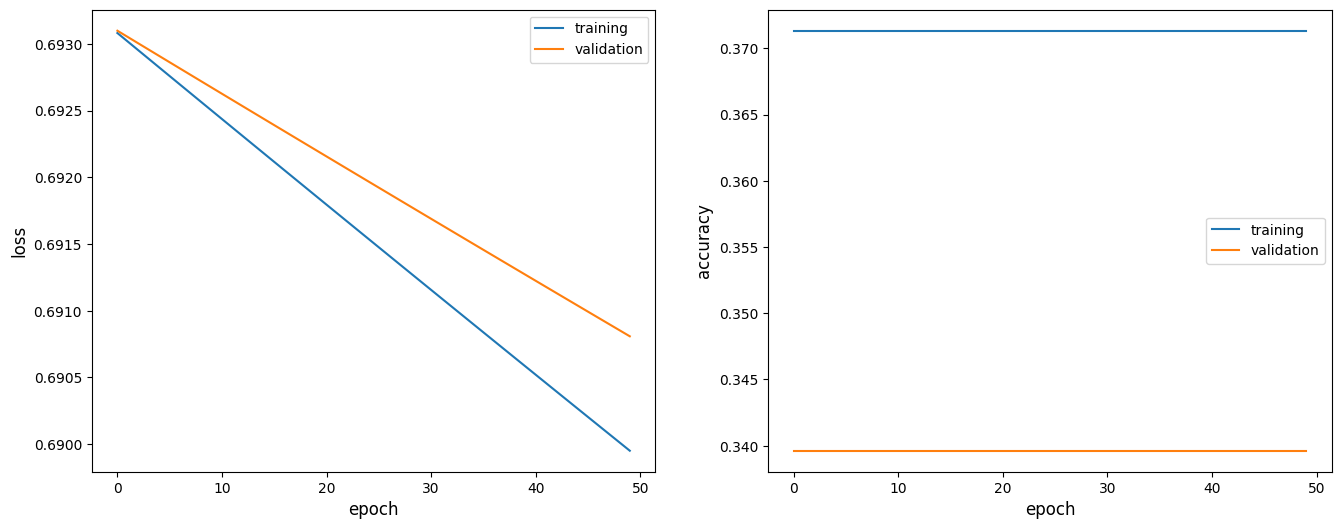

In [ ]:
performance_plot(gklr.get_model_metrics_evaluation())

We can obviously notice that this Guassian KLR underfits for these points:
* In the loss plot: it's true that loss curves have a decreasing order but really slow having this interval [0.693 : 0.690] w.r.t. the number of epochs.
* In the accuracy plot: the accuracy is completely constant with pretty low validation curve distant from the training curve. Indicating that the model haven't learnt any underlying pattern at all.

#Polynomial KLR performance Evaluation

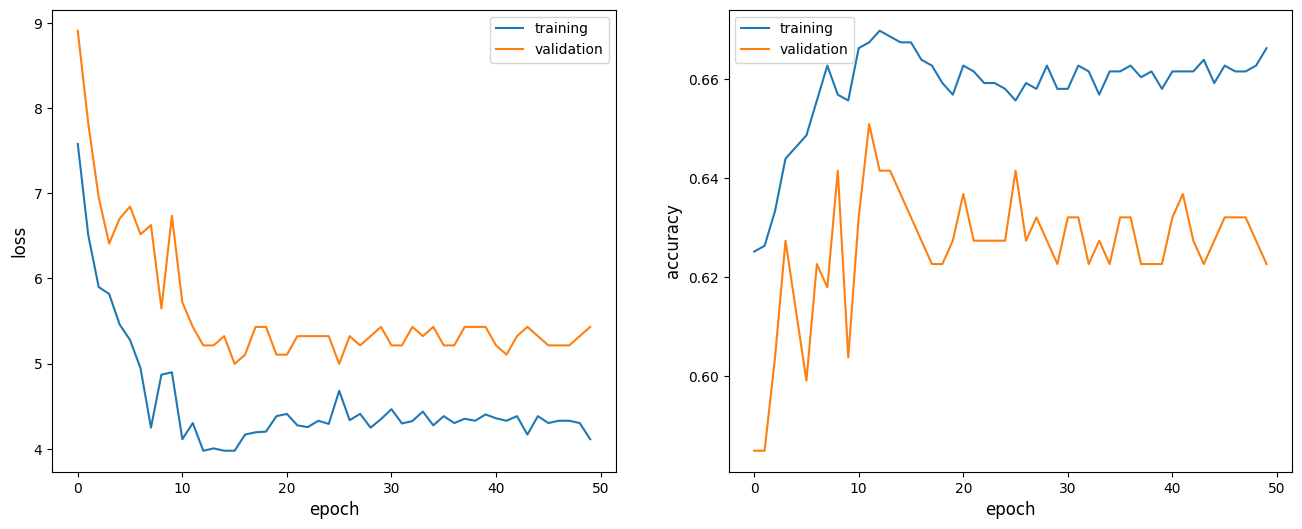

In [ ]:
performance_plot(pklr.get_model_metrics_evaluation())

* The polynomial KLR has oscilliation/spikes (zig-zags) in the training and validation curves within loss and accuracy plots, indicating the instability of the training phase caused by non-coherent weight/bias update steps. An initial solution could be the hyperparameter tuning for polynomial KLR which will be very expensive since it's a kernelized version of LR.

**Note that in case of kernelized SVM model**, we can't plot the loss and accuracy curves per epochs since there's no convention for weights update to converge towards the optimality through epochs * learning rate steps. The kernel trick requires to solve a QP problem in order to determine optimal alphas without iterating the learning phase.
Furthermore, it could be useful to plot the loss and accuracy curves for the kernelized models within the K-fold cross validation. Observing the change of training and validation metrices per fold's iteration, which would help to deduce the relationship between hyperparameters and overfitting/underfitting. But it'll have high time complexity since it requires the reconstruction of kernel matrices.